<p style="padding: 10px;
          color: #7DBCE6;
          text-align: center;
          font-family:Verdana;
          font-size:190%;">
Fuel Consumption EDA & Prediction

</p>


          
<img src="https://media.giphy.com/media/l2R0e9y6A304JkFOg/source.gif"> 

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "border:2px solid #7DBCE6;background-color:#7DBCE6; color:white; font-family:Verdana;text-align: center; font-size:120%;">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style = "color:#7DBCE6; font-family:Verdana;text-align: center; font-size:100%;">Libraries and Utilities<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#7DBCE6; font-family:Verdana;text-align: center; font-size:100%;">Load and Check Data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#7DBCE6; font-family:Verdana;text-align: center; font-size:100%;">Exploratory Data Analysis<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#7DBCE6; font-family:Verdana;text-align: center; font-size:100%;">Missing Values<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#11" role="tab" aria-controls="settings" target="_self" style = "color:#7DBCE6; font-family:Verdana;text-align: center; font-size:100%;">Outliers<span class="badge badge-primary badge-pill">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#12" role="tab" aria-controls="settings" target="_self" style = "color:#7DBCE6; font-family:Verdana;text-align: center; font-size:100%;">Feature Engineering<span class="badge badge-primary badge-pill">6</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#16" role="tab" aria-controls="settings" target="_self" style = "color:#7DBCE6; font-family:Verdana;text-align: center; font-size:100%;">Preprocessing<span class="badge badge-primary badge-pill">7</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#19" role="tab" aria-controls="settings" target="_self" style = "color:#7DBCE6; font-family:Verdana;text-align: center; font-size:100%;">Modeling<span class="badge badge-primary badge-pill">8</span></a>


</div>
</div>
</div>

<a id = "1"></a>
<span style="color:#7DBCE6;
             font-size:150%;
             font-family:Verdana;">
Libraries and Utilities

In [ ]:
!pip install plotly
!pip install nb_black

In [ ]:
import os
import warnings
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             mean_absolute_error,
                             mean_squared_log_error)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

#Visualization
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

#ML Models
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor, 
                              GradientBoostingRegressor)
from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  Lasso,
                                  ElasticNet)
cmap1 = 'Blues'
palette1 = 'Blues'
palette2 = 'Blues_r'
plotly_template = 'ggplot2'
%matplotlib inline
%load_ext nb_black
warnings.filterwarnings("ignore")
colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']
sns.palplot(sns.color_palette(colors))
plt.title('Notebook Colors', size = 12)
plt.axis('off')
plt.show()

<a id = "2"></a>
<span style="color:#7DBCE6;
             font-size:150%;
             font-family:Verdana;">
Load and Check Data

In [ ]:
auto_path = '/kaggle/input/autompg-dataset/'

auto = pd.read_csv(os.path.join(auto_path, 'auto-mpg.csv'), na_values = "?")

auto.head()

In [ ]:
def auto_preprocess(dataframe):
    df_ = dataframe.copy()
    auto_misspelled = {'chevroelt': 'chevrolet',
                       'chevy': 'chevrolet',
                       'vokswagen': 'volkswagen',
                       'vw': 'volkswagen',
                       'hi': 'harvester',
                       'maxda': 'mazda',
                       'toyouta': 'toyota',
                       'mercedes-benz': 'mercedes'}
    df_['make'] = [auto_misspelled[key].title() if key in auto_misspelled else
                   key.title() for key in [i.split()[0] for i in df_['car name']]]
    df_['name'] = [' '.join(i.split()[1:]).title() for i in df_['car name']]
    
    df_ = df_.drop(columns = ['car name'], axis = 1)
    return df_

df = auto_preprocess(auto)
df.head()

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Variable Types

In [ ]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                               'Classes': [dataframe[i].nunique() \
                                           for i in dataframe.columns]})

    nunique_df = nunique_df.sort_values('Classes', ascending=False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(df)

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Descriptive Statistics

In [ ]:
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df[num_cols])

<a id = "3"></a>
<span style="color:#7DBCE6;
             font-size:150%;
             font-family:Verdana;">
Exploratory Data Analysis

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Analysis of Categorical Variables

In [ ]:
def cat_analyser(data, col: str, freq_limit: int = 36):
    df_ = data.copy()
    sns.set(rc = {'axes.facecolor': 'gainsboro',
                  'figure.facecolor': 'gainsboro'})
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
    fig.suptitle(col, fontsize = 16)
    sns.countplot(data = df_,
                  x = col,
                  ax = ax[0],
                  palette= palette1,
                  order =  df_[col].value_counts().index)
    ax[0].set_xlabel('')
    pie_cmap = plt.get_cmap(palette2)
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) 
    data[col].value_counts().plot.pie(autopct = '%1.1f%%',
                                      textprops = {'fontsize': 10},
                                      ax = ax[1],
                                      colors = pie_cmap(
                                                    normalize(df_[col].value_counts())
                                                       )
                                     )
    ax[1].set_ylabel('')
    plt.show()
    matplotlib.rc_file_defaults()
    sns.reset_orig()
        
for col in cat_cols:
    cat_analyser(df, col)

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Analysis of Numerical Variables

In [ ]:
def num_summary(dataframe, col_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Quantiles','Distribution'))

    fig.add_trace(go.Box(y=dataframe[col_name],
                         name = str(col_name),
                         showlegend = False,
                         marker_color = colors[1]),
                  row = 1, col = 1)
    
    fig.add_trace(go.Histogram(x = dataframe[col_name],
                               xbins = dict(start = dataframe[col_name].min(),
                                            end = dataframe[col_name].max()),
                               showlegend = False,
                               name = str(col_name),
                               marker=dict(color=colors[0],
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 2)
    
    fig.update_layout(title = {'text': col_name,
                               'y':0.9,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                      template = plotly_template)
    
    iplot(fig)

for i in num_cols:
    num_summary(df,i)

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
TOP 10 Horsepower

In [ ]:
fig = px.bar(df[['horsepower','make','name']]. \
             sort_values('horsepower', ascending = False)[:10],
             y = 'name',
             x = 'horsepower',
             text = 'horsepower',
             labels={'name':'',
                     'horsepower': 'Horsepower',
                     'make': ''},
             color = 'make',
             color_discrete_sequence = colors)

fig.update_layout(title= dict(text = 'TOP 10 Horsepower',
                              x = 0.5,
                              y = 0.95,
                              xanchor = 'center',
                              yanchor = 'top'),
                  xaxis = dict(title = 'Horsepower'),
                  yaxis = dict(categoryorder='total ascending'),
                  font=dict(family ='Verdana',
                            size = 14,
                            color = 'gray'),
                  template=plotly_template)

fig.show()

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
TOP 10 Weight

In [ ]:
fig = px.bar(df[['weight','make','name']]. \
             sort_values('weight', ascending = False)[:10],
             y = 'name',
             x = 'weight',
             text='weight',
             labels={'name':'',
                     'weight': 'Weight',
                     'make': ''},
             color = 'make',
             color_discrete_sequence = colors)

fig.update_layout(title= dict(text = 'TOP 10 Weight',
                              x = 0.5,
                              y = 0.95,
                              xanchor = 'center',
                              yanchor = 'top'),
                  xaxis = dict(title = 'Weight'),
                  yaxis = dict(categoryorder='total ascending'),
                  font=dict(family = 'Verdana',
                            size = 14,
                            color = 'gray'),
                  template=plotly_template)

fig.show()

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Horsepower - MPG - Cylinders

In [ ]:
data = [go.Scatter(x = df['mpg'],
                   y = df['horsepower'],
                   mode = 'markers',
                   text=df['weight'],
                   marker=dict(size=10,
                               color = df['weight'],
                               showscale=True,
                               colorscale = 'Viridis',
                               colorbar = dict(title='Weight'),
                               opacity=0.8))]

layout = go.Layout(title=dict(text='Horsepower - MPG - Weight',
                              y=0.9,
                              x=0.5,
                              xanchor= 'center',
                              yanchor= 'top'),
                              xaxis = dict(title = 'MPG'),
                              yaxis =dict(title = 'Horsepower'),
                   template=plotly_template)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Horsepower - MPG - Displacement - Weight 

In [ ]:
data = go.Scatter3d(x = df['horsepower'],
                    y = df['mpg'],
                    z = df['displacement'],
                    mode='markers', marker=dict(color=df['weight'],
                                                showscale=True,
                                                colorbar=dict(title='Weight'),
                                                colorscale = 'Viridis',
                                                opacity=0.7))

layout = go.Layout(title = dict(text='Horsepower - MPG - Displacement - Weight',
                                y=0.9,
                                x=0.5,
                                xanchor= 'center',
                                yanchor= 'top'),
                   scene = dict(xaxis = dict(title='Horsepower'),
                                yaxis = dict(title = 'MPG'),
                                zaxis = dict(title='Displacement')),
                   template=plotly_template)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Pairwise Relationships

In [ ]:
fig = go.Figure(data=go.Splom(dimensions=[dict(label=col,
                                               values=df[col]) for col in 
                                          df.select_dtypes(include = ['int', 'float']).columns
                                         ],
                showupperhalf = True, 
                text = df['cylinders'],
                marker = dict(color = [colors[i] for i in df['cylinders']. \
                                     astype('category').cat.codes],
                            showscale = False,
                            opacity = 0.65)
                             )
               )

fig.update_layout(title = {'text': 'Pairwise Relationships by Cylinders',
                          'xanchor': 'center',
                          'yanchor': 'top',
                          'x': 0.5,
                          'y': 0.95},
                  width = 950,
                  height = 950,
                  template = plotly_template)

iplot(fig)

In [ ]:
fig = go.Figure(data=go.Splom(dimensions=[dict(label=col,
                                               values=df[col]) for col in 
                                          df.select_dtypes(include = ['int', 'float']).columns
                                         ],
                showupperhalf = True, 
                text = df['origin'],
                marker = dict(color = [colors[i] for i in df['origin']. \
                                     astype('category').cat.codes],
                            showscale = False,
                            opacity = 0.65)
                             )
               )

fig.update_layout(title = {'text': 'Pairwise Relationships by Origins',
                          'xanchor': 'center',
                          'yanchor': 'top',
                          'x': 0.5,
                          'y': 0.95},
                  width = 950,
                  height = 950,
                  template = plotly_template)

iplot(fig)

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Correlation Coefficients

In [ ]:
def corr_map(dataframe, method: str = 'pearson', title: str = None):
    assert method in ['pearson', 'spearman'], 'Invalid Correlation Method'
    sns.set_style("white")
    corr = dataframe.corr(method=method)
    matrix = np.triu(corr)
    f,ax=plt.subplots(figsize = (matrix.shape[0]*0.75,
                                 matrix.shape[1]*0.75))
    sns.heatmap(corr,
                annot= True,
                fmt = ".2f",
                cbar = False,
                ax=ax,
                vmin = -1,
                vmax = 1,
                mask = matrix,
                cmap = cmap1,
                linewidth = 0.4,
                linecolor = "white",
                annot_kws={"size": 12})
    plt.xticks(rotation=80,size=14)
    plt.yticks(rotation=0,size=14)
    if title == None:
        title = f'{method.title()} Correlation Map'
    plt.title(title, size = 14)
    plt.show()
    
corr_map(df)

<a id = "4"></a>
<span style="color:#7DBCE6;
             font-size:150%;
             font-family:Verdana;">
Missing Values

In [ ]:
def check_missing(dataframe):
    
    missing = pd.DataFrame({'Feature': dataframe.columns,
                           'Missing': [dataframe[i].isnull().sum() for i in dataframe.columns],
                           'Ratio': [100 * dataframe[i].isnull().sum() / dataframe.shape[0] \
                                    for i in dataframe.columns]})
    missing = missing[missing['Missing'] > 0]
    
    if missing.shape[0] == 0:
        print('No missing values')
    else:
        missing = missing.reset_index(drop = True)
        missing = missing.sort_values('Missing', ascending = False)
        return missing
    
check_missing(df)

In [ ]:
df.groupby(cat_cols).agg({'horsepower': ['mean','median']})

In [ ]:
df['horsepower'] = df['horsepower'].fillna(df.groupby(cat_cols)['horsepower'].transform('median'))

check_missing(df)

<a id = "11"></a>
<span style="color:#7DBCE6;
             font-size:150%;
             font-family:Verdana;">
Outliers

In [ ]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1 = q1, q3 = q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in df[num_cols].columns:
    replace_with_thresholds(df, col, q1 = 0.01, q3 = 0.99)
    
desc_stats(df[num_cols])

<img src="https://media.giphy.com/media/sDCma70RplcNG/giphy.gif">

<a id = "12"></a>
<span style="color:#7DBCE6;
             font-size:150%;
             font-family:Verdana;">
Feature Engineering
    
<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
MPG (Dependent Variable)

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.distplot(df.mpg, fit= norm)
plt.show()

(mu, sigma) = norm.fit(df["mpg"])

print("mu: {} sigma = {}".format(mu, sigma))

In [ ]:
fig = plt.figure(figsize = (8,6))
stats.probplot(df["mpg"], plot = plt)
plt.title("Before Log1p Transformation", size = 12)
plt.show()

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Log1p Transformation
    
$$\Huge y_i = {\log_e (x_i+1)} $$
    
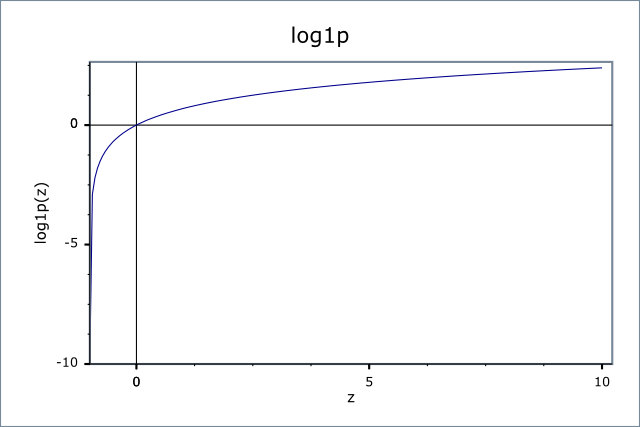

In [ ]:
df["mpg"] = np.log1p(df["mpg"])
plt.figure(figsize = (8,6))
sns.distplot(df.mpg, fit= norm)
plt.show()

(mu, sigma) = norm.fit(df["mpg"])

print("mu: {} sigma = {}".format(mu, sigma))

In [ ]:
fig = plt.figure(figsize = (8,6))
stats.probplot(df["mpg"], plot = plt)
plt.title("After Log1p Transformation", size = 12)
plt.show()

<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Encoding

In [ ]:
def one_hot_encoder(dataframe, categorical_cols: list, drop_first: bool = False):
    dataframe = pd.get_dummies(dataframe,
                               columns = categorical_cols,
                               drop_first = drop_first)
    return dataframe

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
print('Binary Features: {}'.format(binary_cols))

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols.append('make')
print('Multiclass Features: {}'.format(ohe_cols))

In [ ]:
df['cylinders'] = df['cylinders'].astype(int)
df['origin'] = df['origin'].astype(int)
df = one_hot_encoder(df, ohe_cols)
df.head()

In [ ]:
check_class(df)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [ ]:
def rare_analyser(dataframe, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe)}), end="\n\n\n")

rare_analyser(df, cat_cols)

In [ ]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.03).any(axis=None)]

print('Number of useless variables: {}'.format(len(useless_cols)))
df.drop(useless_cols, axis = 1, inplace=True)

In [ ]:
corr_map(df)

<img src="https://media.giphy.com/media/6swcfDQHr3UTm/giphy.gif">

<a id = "16"></a>
<span style="color:#7DBCE6;
             font-size:150%;
             font-family:Verdana;">
Preprocessing
    
<span style="color:#7DBCE6;
             font-size:130%;
             font-family:Verdana;">
Train-Test Split

In [ ]:
X = df.drop(columns = ["mpg", 'name'], axis = 1)

y = df['mpg']

X.head()

In [ ]:
test_size = 0.2

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size  = test_size,
                                                    random_state = random_state)

print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}')
print(f'y_train Shape: {y_train.shape}\ny_test Shape: {y_test.shape}')

<a id = "19"></a>
<span style="color:#7DBCE6;
             font-size:150%;
             font-family:Verdana;">
Modeling

In [ ]:
def train_pipeline(pipe):
    result = dict()
    scaler = pipe.steps[0][1].__class__.__name__
    regressor = pipe.steps[1][1].__class__.__name__
    result['model'] = regressor
    result['scaler'] = scaler if scaler != 'NoneType' else 'Without Scaling'
    
    #Training Model
    pipe.fit(X_train, y_train)
    
    #Get Predictions
    y_pred = pipe.predict(X_test)
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(y_pred)
    
    #Model Evaluation
    result['r2'] =  r2_score(y_test_exp, y_pred_exp),
    result['mse'] =  mean_squared_error(y_test_exp, y_pred_exp),
    result['rmse'] =  mean_squared_error(y_test_exp, y_pred_exp, squared = False)
    result['msle'] =  mean_squared_log_error(y_test_exp, y_pred_exp),
    result['mape'] =  mean_absolute_percentage_error(y_test_exp, y_pred_exp),
    result['mae'] =  mean_absolute_error(y_test_exp, y_pred_exp)
    return result
    
scalers = [None, StandardScaler(), RobustScaler(), MinMaxScaler()]

regressors = [KNeighborsRegressor(), LinearRegression(),
              Lasso(), Ridge(), ElasticNet(), XGBRegressor(),
              LGBMRegressor(), AdaBoostRegressor(), SVR(),
              RandomForestRegressor(), DecisionTreeRegressor(),
              ExtraTreesRegressor(), GradientBoostingRegressor(),
              CatBoostRegressor(silent = True, allow_writing_files = False)]

eval_data = pd.DataFrame()
for reg in regressors:
    for sc in scalers:
        pipeline = Pipeline([('scaler', sc), ('reg', reg)])
        eval_data = eval_data.append(pd.DataFrame(train_pipeline(pipeline)))
    eval_data = eval_data.reset_index(drop = True)
eval_data.sort_values('rmse')

In [ ]:
plt.figure(figsize = (12, 6))
plt.title('Model Evaluation', size = 12)
sns.barplot(data = eval_data,
            y = 'model',
            x = 'rmse',
            order = eval_data.groupby('model').\
            agg({'rmse': 'mean'}).\
            reset_index().\
            sort_values('rmse').model)
plt.ylabel('')
plt.xlabel('Root Mean Squared Error', size = 10)
plt.show()

In [ ]:
plt.figure(figsize = (12, 6))
plt.title('Model Evaluation', size = 12)
sns.barplot(data = eval_data,
            y = 'scaler',
            x = 'rmse',
            order = eval_data.groupby('scaler').\
            agg({'rmse': 'mean'}).\
            reset_index().\
            sort_values('rmse').scaler)
plt.ylabel('')
plt.xlabel('Root Mean Squared Error', size = 10)
plt.show()

<span style="color:#7DBCE6;
             font-size:110%;
             font-family:Verdana;">
If you liked this notebook, please upvote 😊
    
<span style="color:#7DBCE6;
             font-size:110%;
             font-family:Verdana;">
If you have any suggestions or questions, feel free to comment!
    
<span style="color:#7DBCE6;
             font-size:110%;
             font-family:Verdana;">
Best Wishes!

